## TensorFlow 2.0 선택

[런타임] -> [런타임 유형변경]에서 하드웨어 가속기를 꼭 GPU로 설정!

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


## Importing Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


## Hyper Parameters

In [0]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100
n_class = 10

## MNIST/Fashion MNIST Data

In [0]:
## MNIST Dataset #########################################################
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

## Datasets

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  

In [0]:
N_TRAIN = train_images.shape[0]
N_TEST = test_images.shape[0]

In [7]:
train_images.shape

(60000, 28, 28)

In [0]:
# pixel값을 0~1사이 범위로 조정
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
# CNN에 입력으로 넣기 위해 3차원->4차원으로 변경(channel에 1을 추가)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]
# label을 onehot-encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Sequential API

## Model Function

In [0]:
# Sequential API를 사용하여 model 구성
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='SAME', 
                                  input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [10]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [0]:
## model compie
model.compile(optimizers=keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
## training
history = model.fit(train_images, train_labels,
                   epochs=training_epochs, batch_size=batch_size,
                   validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1945 - accuracy: 0.9387 - val_loss: 0.0575 - val_accuracy: 0.9824
Epoch 2/15
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0513 - accuracy: 0.9849 - val_loss: 0.0323 - val_accuracy: 0.9889
Epoch 3/15
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0359 - accuracy: 0.9893 - val_loss: 0.0268 - val_accuracy: 0.9915
Epoch 4/15
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0268 - accuracy: 0.9918 - val_loss: 0.0234 - val_accuracy: 0.9916
Epoch 5/15
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0224 - accuracy: 0.9934 - val_loss: 0.0198 - val_accuracy: 0.9934
Epoch 6/15
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0180 - accuracy: 0.9949 - val_loss: 0.0243 - val_accuracy: 0.9925
Epoch 7/15
60000/60000 [==============================] 

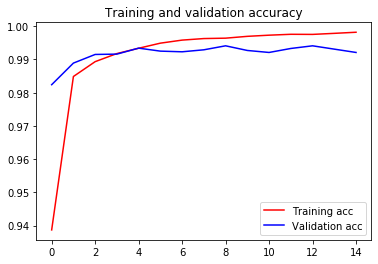

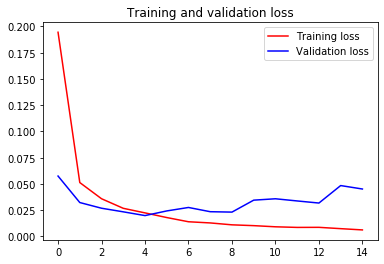

In [13]:
## training curve 확인
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# With tf.data.Dataset

In [0]:
## dataset 만들기
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

In [0]:
## 새로운 model 생성
model = create_model()

In [0]:
## model compile
model.compile(optimizers=keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [17]:
## 학습 전에 결과 확인
model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.3046866092681886, 0.1028]

In [18]:
steps_per_epoch = N_TRAIN//batch_size
validation_steps = N_TEST//batch_size
print(steps_per_epoch, validation_steps)

600 100


In [19]:
## Training
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Train for 600 steps, validate for 100 steps
Epoch 1/15
600/600 [==============================] - 4s 7ms/step - loss: 0.1841 - accuracy: 0.9424 - val_loss: 0.0387 - val_accuracy: 0.9880
Epoch 2/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0495 - accuracy: 0.9846 - val_loss: 0.0264 - val_accuracy: 0.9914
Epoch 3/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0353 - accuracy: 0.9896 - val_loss: 0.0328 - val_accuracy: 0.9892
Epoch 4/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0272 - accuracy: 0.9916 - val_loss: 0.0227 - val_accuracy: 0.9929
Epoch 5/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.0214 - val_accuracy: 0.9932
Epoch 6/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0174 - accuracy: 0.9950 - val_loss: 0.0257 - val_accuracy: 0.9927
Epoch 7/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0154 - accuracy: 0.9955 - va

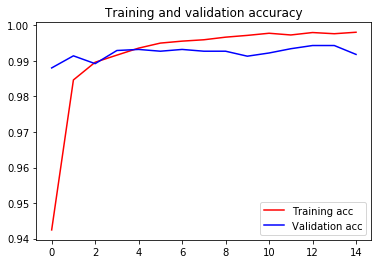

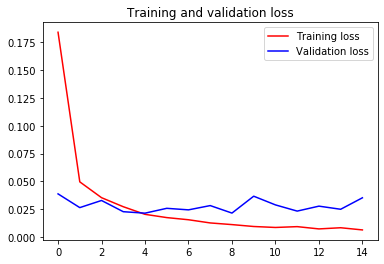

In [20]:
## training curve 확인
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[:,:,0],cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

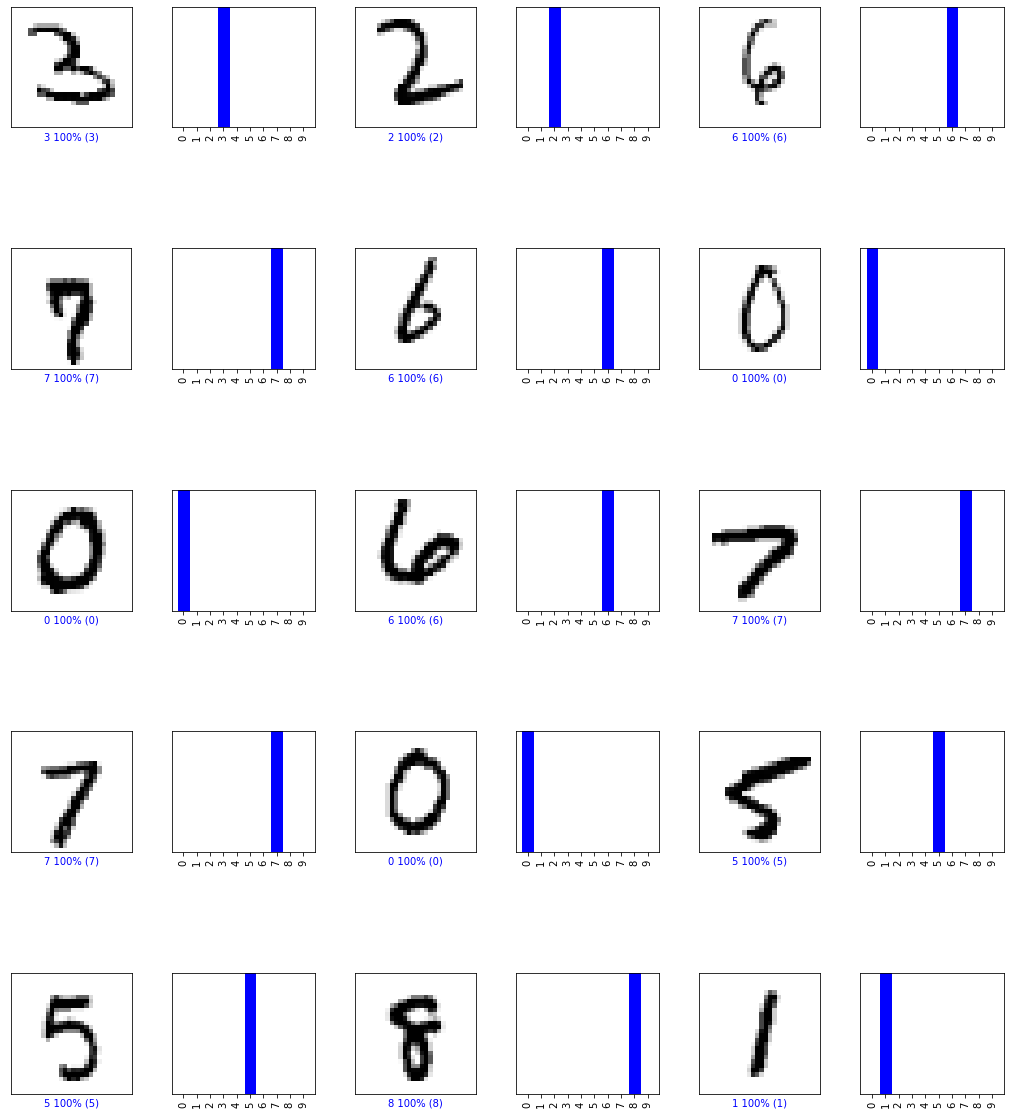

In [22]:
rnd_idx = np.random.randint(1, N_TEST//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# Creating a Checkpoint Directory

In [0]:
cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints'
model_dir_name = 'mnist_cnn_keras'
ckpt_name = 'mnist_cnn_keras.ckpt'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_path = os.path.join(checkpoint_dir, ckpt_name)

# Saving Weights

In [0]:
model.save_weights(checkpoint_path)

In [25]:
!ls 'checkpoints/mnist_cnn_keras'

checkpoint
mnist_cnn_keras.ckpt.data-00000-of-00002
mnist_cnn_keras.ckpt.data-00001-of-00002
mnist_cnn_keras.ckpt.index


# Creating a New Model

In [26]:
new_model1 = create_model()
new_model1.compile(optimizers=keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
new_model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

# Test Accuracy before Restore

In [27]:
new_model1.evaluate(test_dataset)

100/100 [==============================] - 0s 4ms/step - loss: 2.3077 - accuracy: 0.0907


[2.3077020120620726, 0.0907]

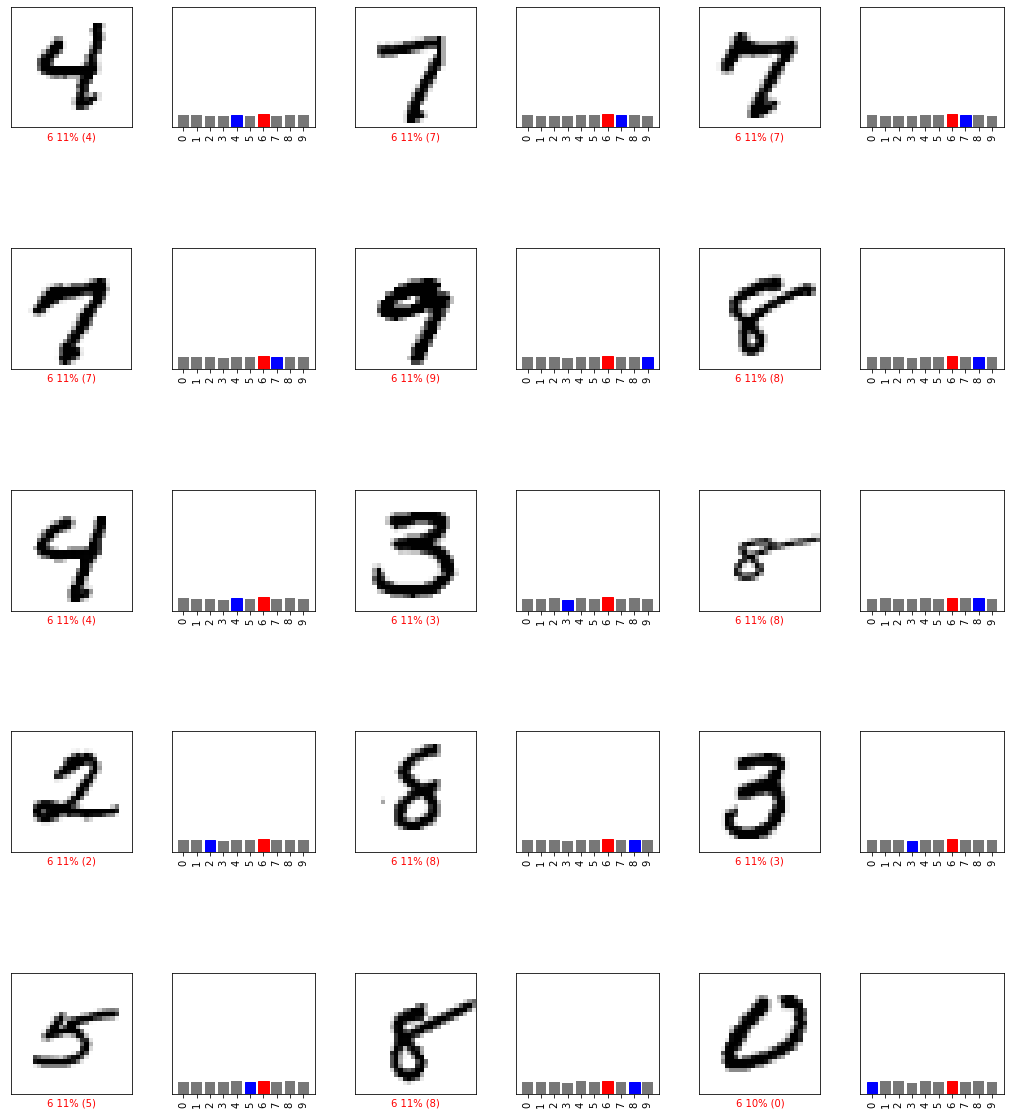

In [28]:
rnd_idx = np.random.randint(1, N_TEST//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = new_model1(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# Restore Weights

In [29]:
new_model1.load_weights(checkpoint_path)

# Test Accuracy after Restore

In [30]:
new_model1.evaluate(test_dataset)

100/100 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9918


[0.03518141900283439, 0.9918]

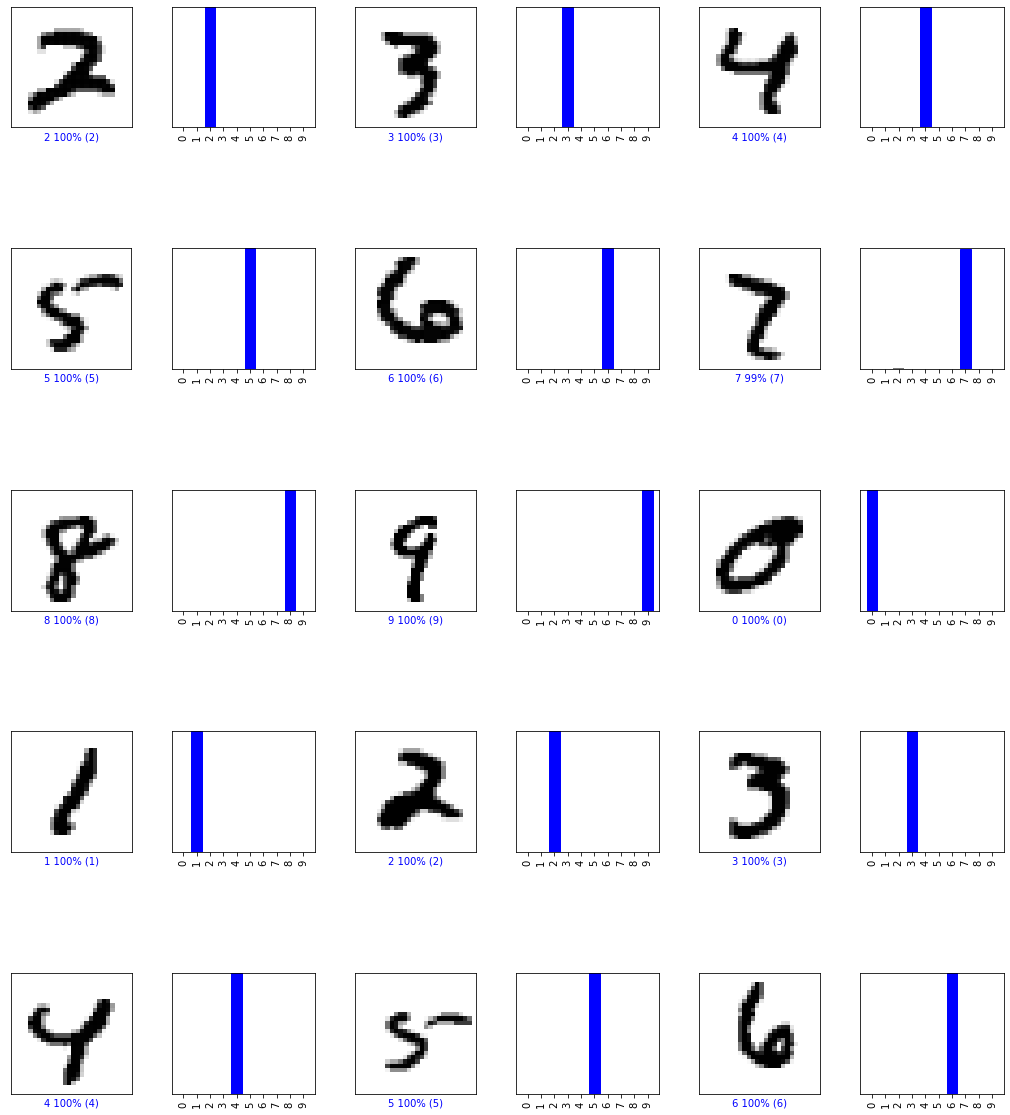

In [31]:
rnd_idx = np.random.randint(1, N_TEST//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = new_model1(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

## Callback 사용하여 저장하기

In [32]:
## 새로운 model 생성
model = create_model()

## model compile
model.compile(optimizers=keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)             

In [33]:
## 학습 전에 결과 확인
model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.298526171875, 0.1217]

In [34]:
ckpt_name = 'mnist_cnn_{epoch:04d}.ckpt'
checkpoint_path = os.path.join(checkpoint_dir, ckpt_name)

# callback 만들기
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                              save_weights_only=True)

## Training
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps,
                    callbacks=[cp_callback])

Train for 600 steps, validate for 100 steps
Epoch 1/15
600/600 [==============================] - 5s 8ms/step - loss: 0.1932 - accuracy: 0.9380 - val_loss: 0.0458 - val_accuracy: 0.9854
Epoch 2/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0517 - accuracy: 0.9846 - val_loss: 0.0320 - val_accuracy: 0.9894
Epoch 3/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0351 - accuracy: 0.9894 - val_loss: 0.0275 - val_accuracy: 0.9909
Epoch 4/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0277 - accuracy: 0.9916 - val_loss: 0.0253 - val_accuracy: 0.9924
Epoch 5/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0221 - accuracy: 0.9938 - val_loss: 0.0226 - val_accuracy: 0.9930
Epoch 6/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.0222 - val_accuracy: 0.9928
Epoch 7/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0155 - accuracy: 0.9955 - va

In [35]:
!ls 'checkpoints/mnist_cnn_keras'

checkpoint
mnist_cnn_0001.ckpt.data-00000-of-00002
mnist_cnn_0001.ckpt.data-00001-of-00002
mnist_cnn_0001.ckpt.index
mnist_cnn_0002.ckpt.data-00000-of-00002
mnist_cnn_0002.ckpt.data-00001-of-00002
mnist_cnn_0002.ckpt.index
mnist_cnn_0003.ckpt.data-00000-of-00002
mnist_cnn_0003.ckpt.data-00001-of-00002
mnist_cnn_0003.ckpt.index
mnist_cnn_0004.ckpt.data-00000-of-00002
mnist_cnn_0004.ckpt.data-00001-of-00002
mnist_cnn_0004.ckpt.index
mnist_cnn_0005.ckpt.data-00000-of-00002
mnist_cnn_0005.ckpt.data-00001-of-00002
mnist_cnn_0005.ckpt.index
mnist_cnn_0006.ckpt.data-00000-of-00002
mnist_cnn_0006.ckpt.data-00001-of-00002
mnist_cnn_0006.ckpt.index
mnist_cnn_0007.ckpt.data-00000-of-00002
mnist_cnn_0007.ckpt.data-00001-of-00002
mnist_cnn_0007.ckpt.index
mnist_cnn_0008.ckpt.data-00000-of-00002
mnist_cnn_0008.ckpt.data-00001-of-00002
mnist_cnn_0008.ckpt.index
mnist_cnn_0009.ckpt.data-00000-of-00002
mnist_cnn_0009.ckpt.data-00001-of-00002
mnist_cnn_0009.ckpt.index
mnist_cnn_0010.ckpt.data-00000-of-0

In [36]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'/content/checkpoints/mnist_cnn_keras/mnist_cnn_0015.ckpt'

In [37]:
# Create a new model instance
new_model2 = create_model()
new_model2.compile(optimizers=keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
# Before loading weights
new_model2.evaluate(test_dataset)

# Load the previously saved weights
new_model2.load_weights(latest)

# Re-evaluate the model
new_model2.evaluate(test_dataset)

100/100 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9929


[0.030288264457572236, 0.9929]

# Whole-model Saving

## HDF5 format으로 전체 model 저장하기

In [38]:
save_dir_name = 'saved_models'
os.makedirs(save_dir_name, exist_ok=True)
hdf5_model_path = os.path.join(cur_dir, save_dir_name, 'my_model.h5')
hdf5_model_path

'/content/saved_models/my_model.h5'

In [0]:
model.save(hdf5_model_path)

In [40]:
!ls saved_models

mnist_cnn_func.h5  mnist_cnn_func_pb  mnist_cnn_subclass  my_model  my_model.h5


## Recreate the same model

In [0]:
new_model3 = keras.models.load_model(hdf5_model_path)

In [42]:
new_model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)             

In [43]:
new_model3.evaluate(test_dataset)

100/100 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9929


[0.030288264457572236, 0.9929]

## saved_model format으로 저장하기(.pb)

In [0]:
saved_model_path = os.path.join(cur_dir, save_dir_name, 'my_model')

In [45]:
model.save(saved_model_path)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/saved_models/my_model/assets


In [46]:
!ls saved_models

mnist_cnn_func.h5  mnist_cnn_func_pb  mnist_cnn_subclass  my_model  my_model.h5


## Recreate the same model

In [0]:
new_model4 = keras.models.load_model(saved_model_path)

In [48]:
new_model4.evaluate(test_dataset)

100/100 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9929


[0.030288363840203374, 0.9929]

# Fuctional API

In [0]:
# Functional API를 사용하여 model 구성
def create_model():
    inputs = keras.Input(shape=(28, 28, 1))
    conv1 = keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation='relu')(inputs)
    pool1 = keras.layers.MaxPool2D(padding='SAME')(conv1)
    conv2 = keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation='relu')(pool1)
    pool2 = keras.layers.MaxPool2D(padding='SAME')(conv2)
    conv3 = keras.layers.Conv2D(filters=128, kernel_size=[3, 3], padding='SAME', activation='relu')(pool2)
    pool3 = keras.layers.MaxPool2D(padding='SAME')(conv3)
    pool3_flat = keras.layers.Flatten()(pool3)
    dense4 = keras.layers.Dense(units=256, activation='relu')(pool3_flat)
    drop4 = keras.layers.Dropout(rate=0.4)(dense4)
    logits = keras.layers.Dense(units=10, activation='softmax')(drop4)
    return keras.Model(inputs=inputs, outputs=logits)

In [0]:
model = create_model()

In [51]:
## model compile
model.compile(optimizers=keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 128)         0     

In [52]:
## 학습전 accuracy 확인
model.evaluate(test_dataset)

100/100 [==============================] - 0s 4ms/step - loss: 2.3051 - accuracy: 0.0839


[2.305088062286377, 0.0839]

In [53]:
## Training
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Train for 600 steps, validate for 100 steps
Epoch 1/15
600/600 [==============================] - 5s 8ms/step - loss: 0.1911 - accuracy: 0.9379 - val_loss: 0.0382 - val_accuracy: 0.9874
Epoch 2/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0486 - accuracy: 0.9850 - val_loss: 0.0255 - val_accuracy: 0.9914
Epoch 3/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0337 - accuracy: 0.9900 - val_loss: 0.0249 - val_accuracy: 0.9925
Epoch 4/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0254 - accuracy: 0.9923 - val_loss: 0.0204 - val_accuracy: 0.9935
Epoch 5/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0265 - val_accuracy: 0.9931
Epoch 6/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0178 - accuracy: 0.9944 - val_loss: 0.0220 - val_accuracy: 0.9926
Epoch 7/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0138 - accuracy: 0.9959 - va

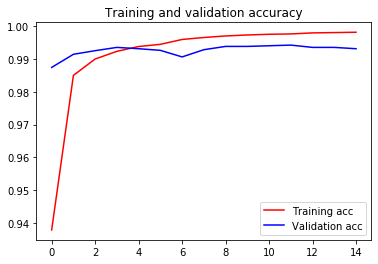

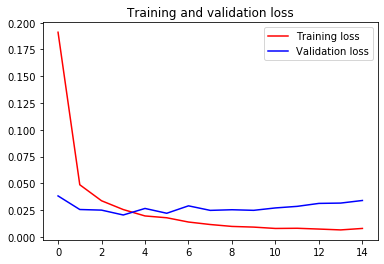

In [54]:
## training curve 확인
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

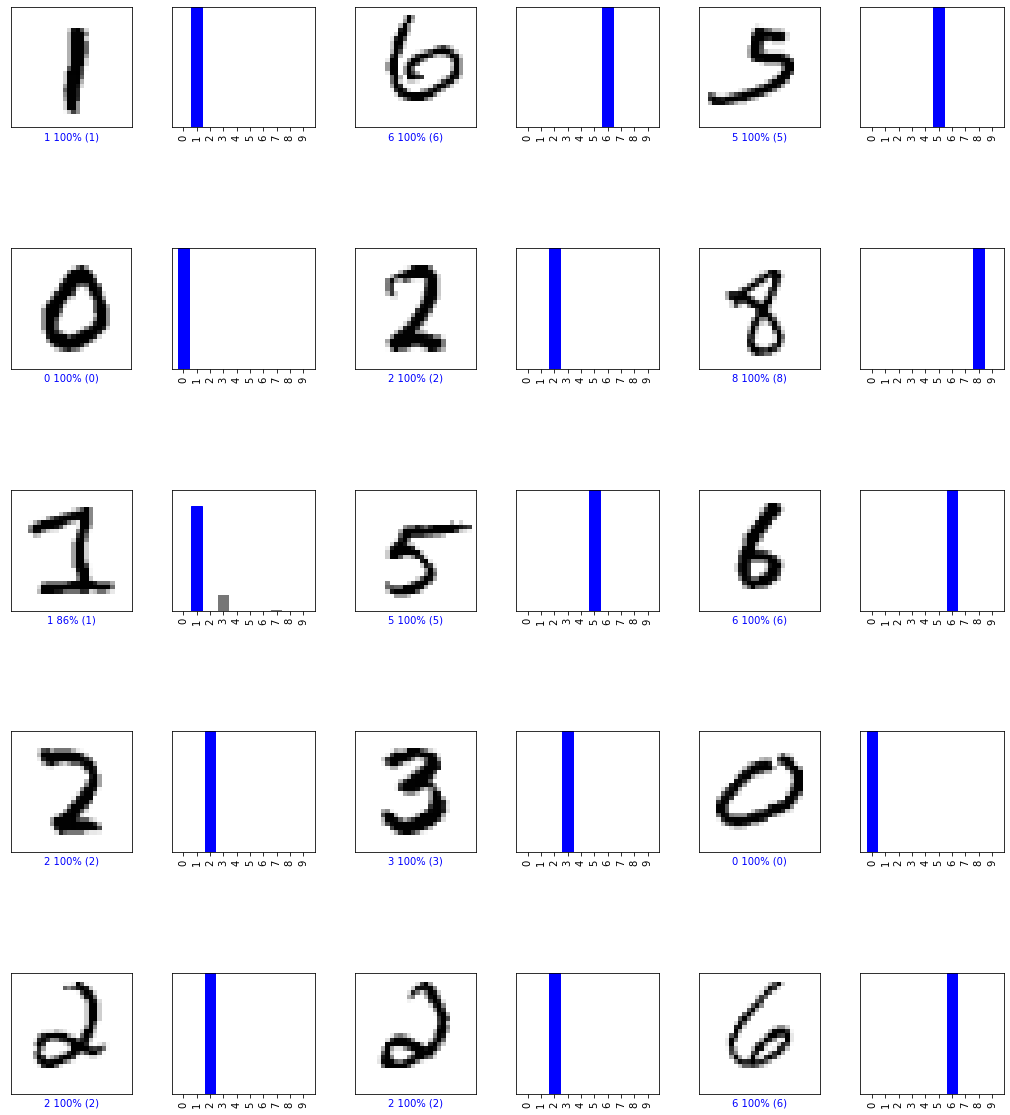

In [55]:
rnd_idx = np.random.randint(1, N_TEST//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())

In [0]:
saved_model_path = os.path.join(cur_dir, save_dir_name, 'mnist_cnn_func.h5')

In [0]:
model.save(saved_model_path)

In [58]:
!ls saved_models

mnist_cnn_func.h5  mnist_cnn_func_pb  mnist_cnn_subclass  my_model  my_model.h5


In [59]:
new_model5 = keras.models.load_model(saved_model_path)
new_model5.evaluate(test_dataset)

100/100 [==============================] - 0s 4ms/step - loss: 0.0339 - accuracy: 0.9931


[0.033920638731554424, 0.9931]

In [60]:
saved_model_path = os.path.join(cur_dir, save_dir_name, 'mnist_cnn_func_pb')
model.save(saved_model_path)
!ls saved_models/mnist_cnn_func_pb

INFO:tensorflow:Assets written to: /content/saved_models/mnist_cnn_func_pb/assets
assets	saved_model.pb	variables


In [61]:
new_model6 = keras.models.load_model(saved_model_path)
new_model6.evaluate(test_dataset)

100/100 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9931


[0.03351509020877387, 0.9931]

# Custom Model - Subclassing

In [0]:
class MyModel(keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()    
    self.conv1 = keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation='relu')
    self.pool1 = keras.layers.MaxPool2D(padding='SAME')
    self.conv2 = keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation='relu')
    self.pool2 = keras.layers.MaxPool2D(padding='SAME')
    self.conv3 = keras.layers.Conv2D(filters=128, kernel_size=[3, 3], padding='SAME', activation='relu')
    self.pool3 = keras.layers.MaxPool2D(padding='SAME')
    self.pool3_flat = keras.layers.Flatten()
    self.dense4 = keras.layers.Dense(units=256, activation='relu')
    self.drop4 = keras.layers.Dropout(rate=0.4)
    self.dense5 = keras.layers.Dense(units=10, activation='softmax')
  
  def call(self, x, training=False):
    x = self.conv1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.pool2(x)
    x = self.conv3(x)
    x = self.pool3(x)
    x = self.pool3_flat(x)
    x = self.dense4(x)
    x = self.drop4(x)
    return self.dense5(x)    

In [0]:
model = MyModel()

In [0]:
## model compile
model.compile(optimizers=keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [65]:
## Training
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Train for 600 steps, validate for 100 steps
Epoch 1/15
600/600 [==============================] - 4s 7ms/step - loss: 0.1925 - accuracy: 0.9391 - val_loss: 0.0338 - val_accuracy: 0.9885
Epoch 2/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0503 - accuracy: 0.9851 - val_loss: 0.0307 - val_accuracy: 0.9902
Epoch 3/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0335 - accuracy: 0.9900 - val_loss: 0.0230 - val_accuracy: 0.9921
Epoch 4/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0259 - accuracy: 0.9921 - val_loss: 0.0401 - val_accuracy: 0.9879
Epoch 5/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0214 - accuracy: 0.9936 - val_loss: 0.0282 - val_accuracy: 0.9918
Epoch 6/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0177 - accuracy: 0.9947 - val_loss: 0.0243 - val_accuracy: 0.9929
Epoch 7/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0159 - accuracy: 0.9951 - va

In [66]:
model.save('saved_models/mnist_cnn_subclass')

INFO:tensorflow:Assets written to: saved_models/mnist_cnn_subclass/assets


In [0]:
new_model7 = keras.models.load_model('saved_models/mnist_cnn_subclass')

In [68]:
new_model7.evaluate(test_dataset)

100/100 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9918


[0.040821461038212874, 0.9918]